In [19]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.cluster import KMeans

Data Collection & Analysis

In [3]:
# loading the data from csv file to a Pandas DataFrame
# https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

customer_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mall_Customers.csv')

In [4]:
# first 5 rows in the dataframe
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# finding the number of rows and columns
customer_data.shape

# data available for 200 customers

(200, 5)

In [6]:
# getting some informations about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
# checking for missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Choosing the Annual Income Column & Spending Score column

In [8]:
X = customer_data.iloc[:,[3,4]].values
# x-axis : annual income 
# y-axis : spending score

In [9]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

Choosing the number of clusters

WCSS  ->  Within Clusters Sum of Squares

In [10]:
# finding wcss value for different number of clusters
# cost function --> within cluster the sum of square distances of each data point from the centroid of that cluster

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  # ‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence

  kmeans.fit(X)

  wcss.append(kmeans.inertia_)
  # inertia_float : Sum of squared distances of samples to their closest cluster center.

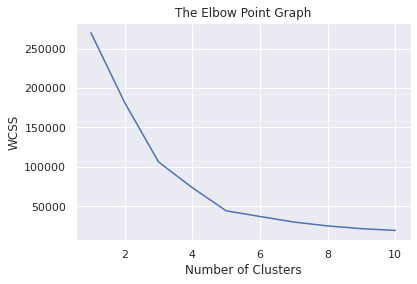

In [11]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum Number of Clusters = 5

Training the k-Means Clustering Model

In [12]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0) #best-fit model

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 4 2 0 2 4 2 4 2 0 2 4 2 4 2 4 2 4 2 0 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


5 Clusters -  0, 1, 2, 3, 4

Visualizing all the Clusters

In [13]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

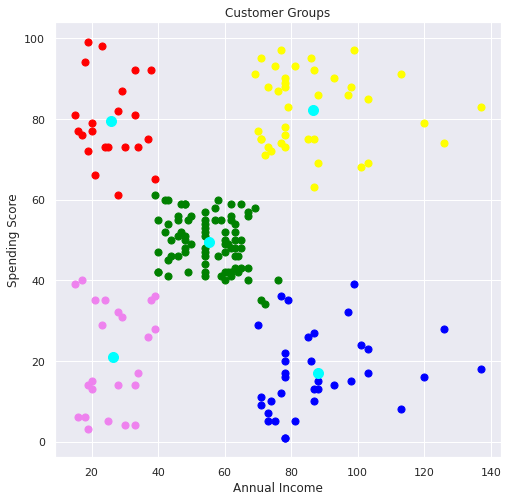

In [14]:
# plotting all the clusters and their Centroids
# x-axis : annual income 
# y-axis : spending score

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
  # cluster_centers_ndarray of shape (n_clusters, n_features) : Coordinates of cluster centers. 
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

### Measuring performance of clusteres

For n_clusters =  4  The average silhouette_score is : 0.4931963109249047
For n_clusters =  5  The average silhouette_score is : 0.553931997444648
For n_clusters =  6  The average silhouette_score is : 0.53976103063432
For n_clusters =  7  The average silhouette_score is : 0.5281944387251989
For n_clusters =  8  The average silhouette_score is : 0.45827056882053113
For n_clusters =  9  The average silhouette_score is : 0.457462901394195


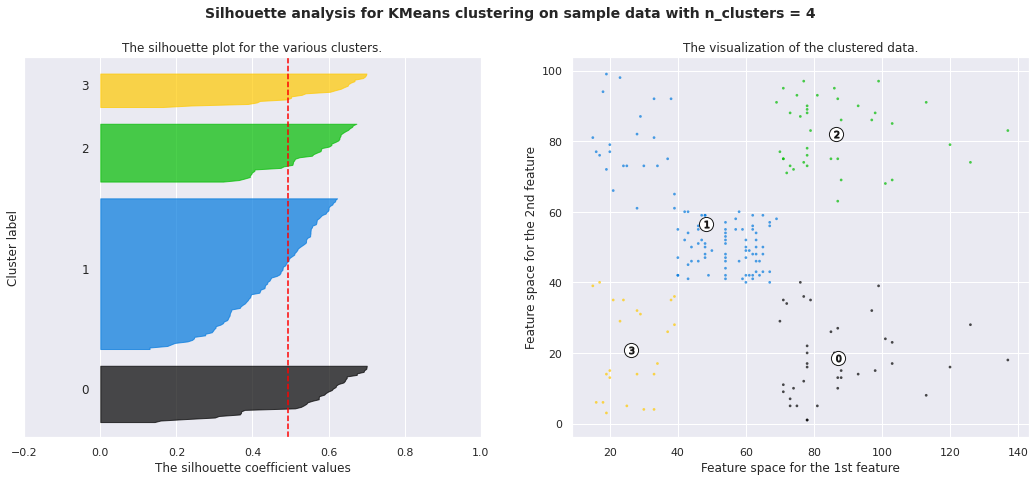

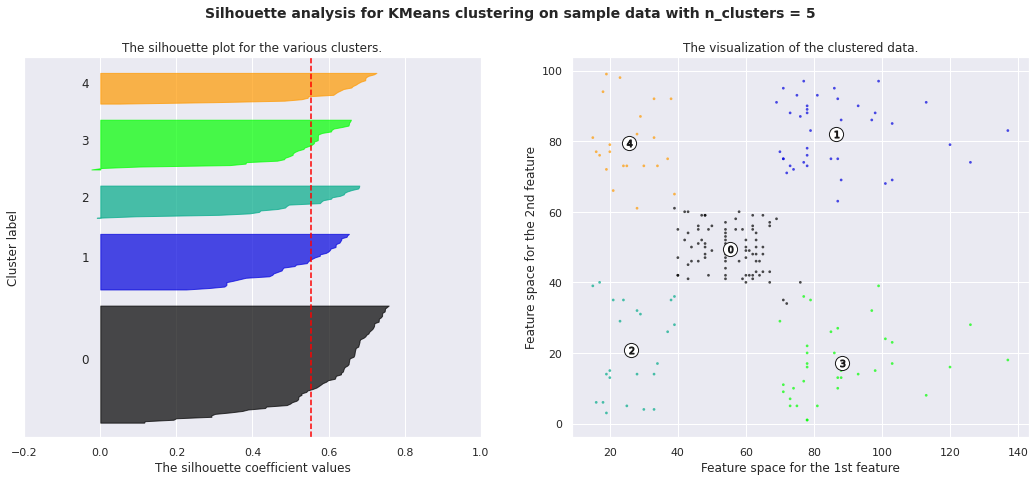

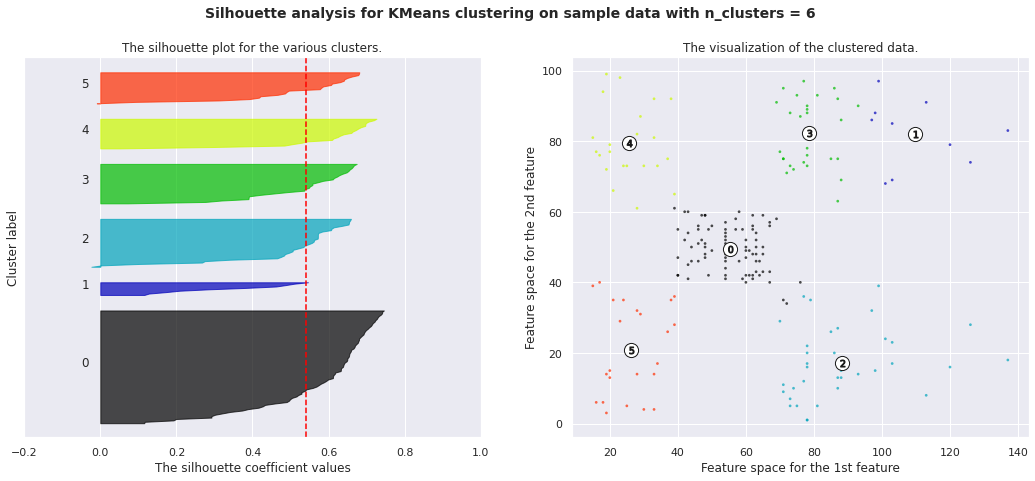

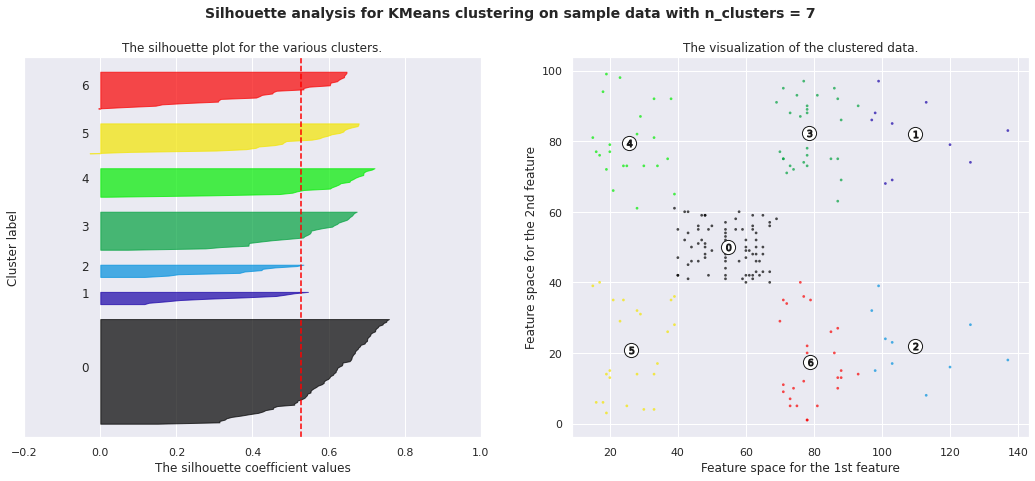

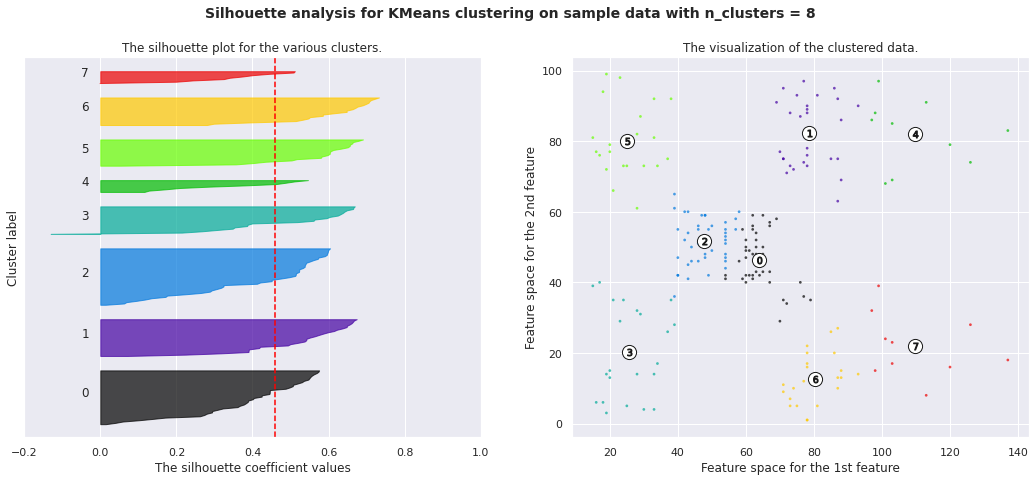

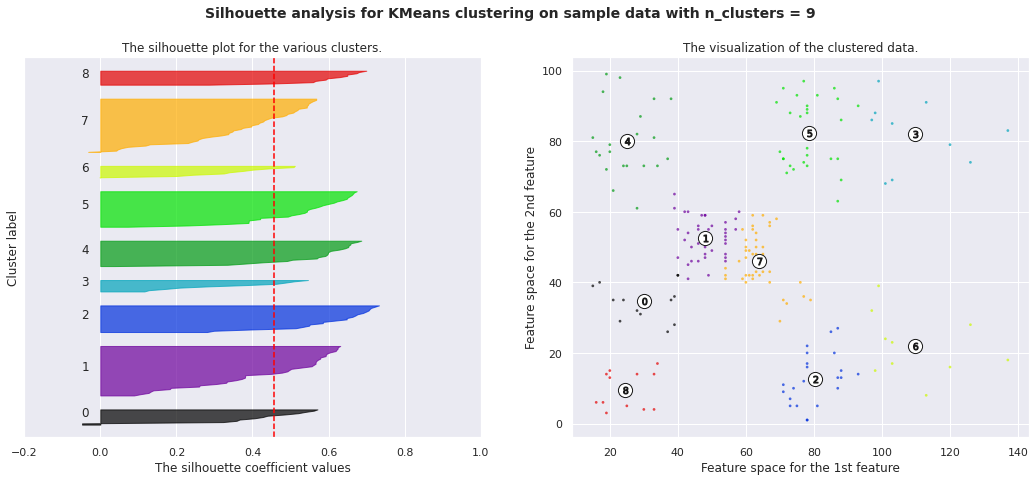

In [32]:
# Metrics for clustering algorithms
from sklearn.metrics import silhouette_samples, silhouette_score

# Based on the elbow plot we choose various candidates for number of clusters
clusters = [4,5,6,7,8,9]




for cluster in clusters:
  # creating a sub-plot with 2 columns
  fig, (ax1, ax2) = plt.subplots(1,2) # 1 row, 2 columns
  fig.set_size_inches(18, 7)

  # silhouette coefficient can range from -1 to 1
  # -1 being worst, 1 being the best
  ax1.set_xlim([-0.2,1])

  # we need to insert blank space between silhouette plots, 
  ax1.set_ylim([0, len(X) + (cluster + 1) * 10])

  km_cluster = KMeans(n_clusters=cluster, random_state= 1)
  cluster_labels = km_cluster.fit_predict(X)


  # "silhoutte_score" gives the average value for all the samples, a perspective into density and separation of clusters formed

  silhoutte_avg = silhouette_score(X, cluster_labels)
  print("For n_clusters = ", cluster, " The average silhouette_score is :", silhoutte_avg)


  # Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(X, cluster_labels)



  # plotting silhoutte graph
  y_lower = 10
  for i in range(cluster):
      # Aggregate the silhouette scores for samples belonging to
      # cluster i, and sort them
      ith_cluster_silhouette_values = \
          sample_silhouette_values[cluster_labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.nipy_spectral(float(i) / cluster)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

      # Label the silhouette plots with their cluster numbers at the middle
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      # Compute the new y_lower for next plot
      y_lower = y_upper + 10  # 10 for the 0 samples

  ax1.set_title("The silhouette plot for the various clusters.")
  ax1.set_xlabel("The silhouette coefficient values")
  ax1.set_ylabel("Cluster label")

  # The vertical line for average silhouette score of all the values
  ax1.axvline(x=silhoutte_avg, color="red", linestyle="--")

  ax1.set_yticks([])  # Clear the yaxis labels / ticks
  ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

  # 2nd Plot showing the actual clusters formed
  colors = cm.nipy_spectral(cluster_labels.astype(float) / cluster)
  ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
              c=colors, edgecolor='k')

  # Labeling the clusters
  centers = km_cluster.cluster_centers_


  # Draw white circles at cluster centers
  ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
              c="white", alpha=1, s=200, edgecolor='k')

  for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                  s=50, edgecolor='k')

  ax2.set_title("The visualization of the clustered data.")
  ax2.set_xlabel("Feature space for the 1st feature")
  ax2.set_ylabel("Feature space for the 2nd feature")

  plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                "with n_clusters = %d" % cluster),
                fontsize=14, fontweight='bold')

plt.show()